<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Для воспроизводимости решения`



# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [3]:
for i in range(0, len(df_train)):
  try:
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except:
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
      continue
    elif df_train.loc[i, 'max_power'] == '0':
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else:
      df_train.loc[i, 'max_power'] = 0


In [4]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


`Есть ли в датасете пропуски?`

Да есть, в колонках mileage, engine, max_power, torque, seats

In [5]:
print(f"В трейне {df_train.duplicated().sum()} дубликатов")
print(f"В тесте {df_test.duplicated().sum()} дубликата")


В трейне 985 дубликатов
В тесте 62 дубликата


In [6]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df_train, title="Profiling Report")

In [7]:
# profile.to_file("your_report.html")

Выводы по дашборду:

Данные содержат большУю часть пропущенных значений (1,1%) и дупликатов (7 %)

Большая часть машин года выпуска от 2010 до 2020, в ценах продажи есть нетипичное значение, похожее на выброс - 10 млн.
Похожая ситуация с пробегом, есть машина с пробегом 2360457 миль, что является явным выбросом.
По топливу большинство машин или на бензине, или на дизеле, очень маленькая часть на газу. Продают в основном физ лица, и часто пеервый владелец.

Колонка mileage содержит данные типа object, хоть и в основном содержит float, но также часто встречается строка kmpl.

Если посмотреть на корреляцию, очень высокая отрицательная корреляция между пробегом и годом выпуска автомобиля, а также между пробегом и ценой продажи. Также мощность двигателя сильно зависит от потребляемого топлива


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [8]:
print("Основные статистики по числовым столбцам трейна")
df_train[list(col for col in df_train.columns if df_train[col].dtype in ["int64", "float64"])].describe()

Основные статистики по числовым столбцам трейна


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
print("Основные статистики по числовым столбцам теста")
df_test[list(col for col in df_test.columns if df_test[col].dtype in ["int64", "float64"])].describe()

Основные статистики по числовым столбцам теста


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


Среднее и медиана в трейне и тесте практически совпадают, это значит, что разбиение данных подходит для обучения и валидации модели. Не возникнет ситуация, когда метрики качества модели будут искажены различным распределением признаков в трейне и тесте.

In [10]:
print("Основные статистики по категориальным столбцам теста")
df_train[list(col for col in df_train.columns if df_train[col].dtype in ["object"])].describe()

Основные статистики по категориальным столбцам теста


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803.0,6796
unique,1924,4,3,2,5,386,120,313.0,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74.0,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330.0,468


In [11]:
print("Основные статистики по категориальным столбцам теста")
df_test[list(col for col in df_test.columns if df_test[col].dtype in ["object"])].describe()

Основные статистики по категориальным столбцам теста


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


По категориальным признакам статистики трейна и теста так же близки (по самому частому значению). Однако все же колонки mileage, engine, max_power, torque все же лучше привести к численному типу для правильной работы в будущем.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

Да, в трейне есть объекты с одинаковыми признаковыми описаниями (дубликаты)

In [12]:
print(f"Дубликатов {df_train.drop(columns=["selling_price"]).duplicated(keep=False).sum()} штук")

Дубликатов 1799 штук


In [13]:
df_train = df_train.drop_duplicates(subset=df_train.columns.drop('selling_price')).reset_index(drop=True)

In [14]:
assert df_train.shape == (5840, 13)

Да, в данных могли остаться дубликаты. Прежде всего это связано с колонками mileage, engine, max_power и torque. Они хоть и числовые по смыслу, на деле являются типам object, и поэтому данные там не приведены к одному виду, например max power 74 и 74 bhp. Таким образом, нужно сначала обработать эти колонки и потом провести полное удаление дубликатов.

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [15]:
def drop_measurement(df, col):
  return df[col].astype("str").apply(lambda x: x.split()[0]).astype(float)

In [16]:
for data in [df_train, df_test]:
  for col in ["mileage", "engine", "max_power"]:
    data[col] = drop_measurement(data, col)

In [17]:
import re

def process_torque(value):
    if pd.isna(value):
        return np.nan, np.nan

    text = str(value).lower().replace(',', '')

    numbers = [float(b or a) for a, b in re.findall(r'(\d+(?:\.\d+)?)(?:-(\d+(?:\.\d+)?))?', text)]

    # Крутящий момент всегда меньше количества оборотов в минуту
    moment = min(numbers)
    rpm = max(numbers)

    is_kgm = 'kgm' in text

    if is_kgm and not pd.isna(moment):
        moment *= 9.81

    return moment, rpm

In [18]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: pd.Series(process_torque(x)))
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: pd.Series(process_torque(x)))

# df_train['torque'].apply(lambda x: pd.Series(process_torque(x)))

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






Медиану нужно считать для тест и трейн отдельно, чтобы не происходило data leak.

Вместо медианы применять среднее лучше не стоит, так как среднее в отличие от медианы будет сильно завсисеть от выбросов. То есть медиана более точно будет отражать тендеции в признаке.

In [19]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,186
engine,186


In [20]:
df_train[df_train.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
5737,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
5748,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
5794,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_train.fillna(df_train[["mileage", "engine", "max_power", "torque", "seats", "max_torque_rpm"]].median(), inplace=True)
df_test.fillna(df_test[["mileage", "engine", "max_power", "torque", "seats", "max_torque_rpm"]].median(), inplace=True)

In [22]:
df_train[df_train.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [23]:
df_train.seats = df_train.seats.astype(int)
df_test.seats = df_test.seats.astype(int)

df_train.engine = df_train.engine.astype(int)
df_test.engine = df_test.engine.astype(int)

В данном случае столбец seats, имея всего 9 различных значений, отражает количество мест в автомобиле а значит и его тип. То есть, например, 14 мест - автобус, а 4 места - стандартный легковой автомобиль.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [24]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.892354,175.362604,5.426712,3044.453425
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.661223,107.161624,0.982344,913.009526
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.088000,2.000000,400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.124000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.900000,14.000000,21800.000000


Нет оснований предполагать, что заполнение пропусков сдвинуло распределение. Так как заполнение медианой может сместить лишь среднее значение, если распределение данных сильно отличается от нормального. То есть если распределение данных неравномерное, то заполнение пропусков может изменить статистики

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

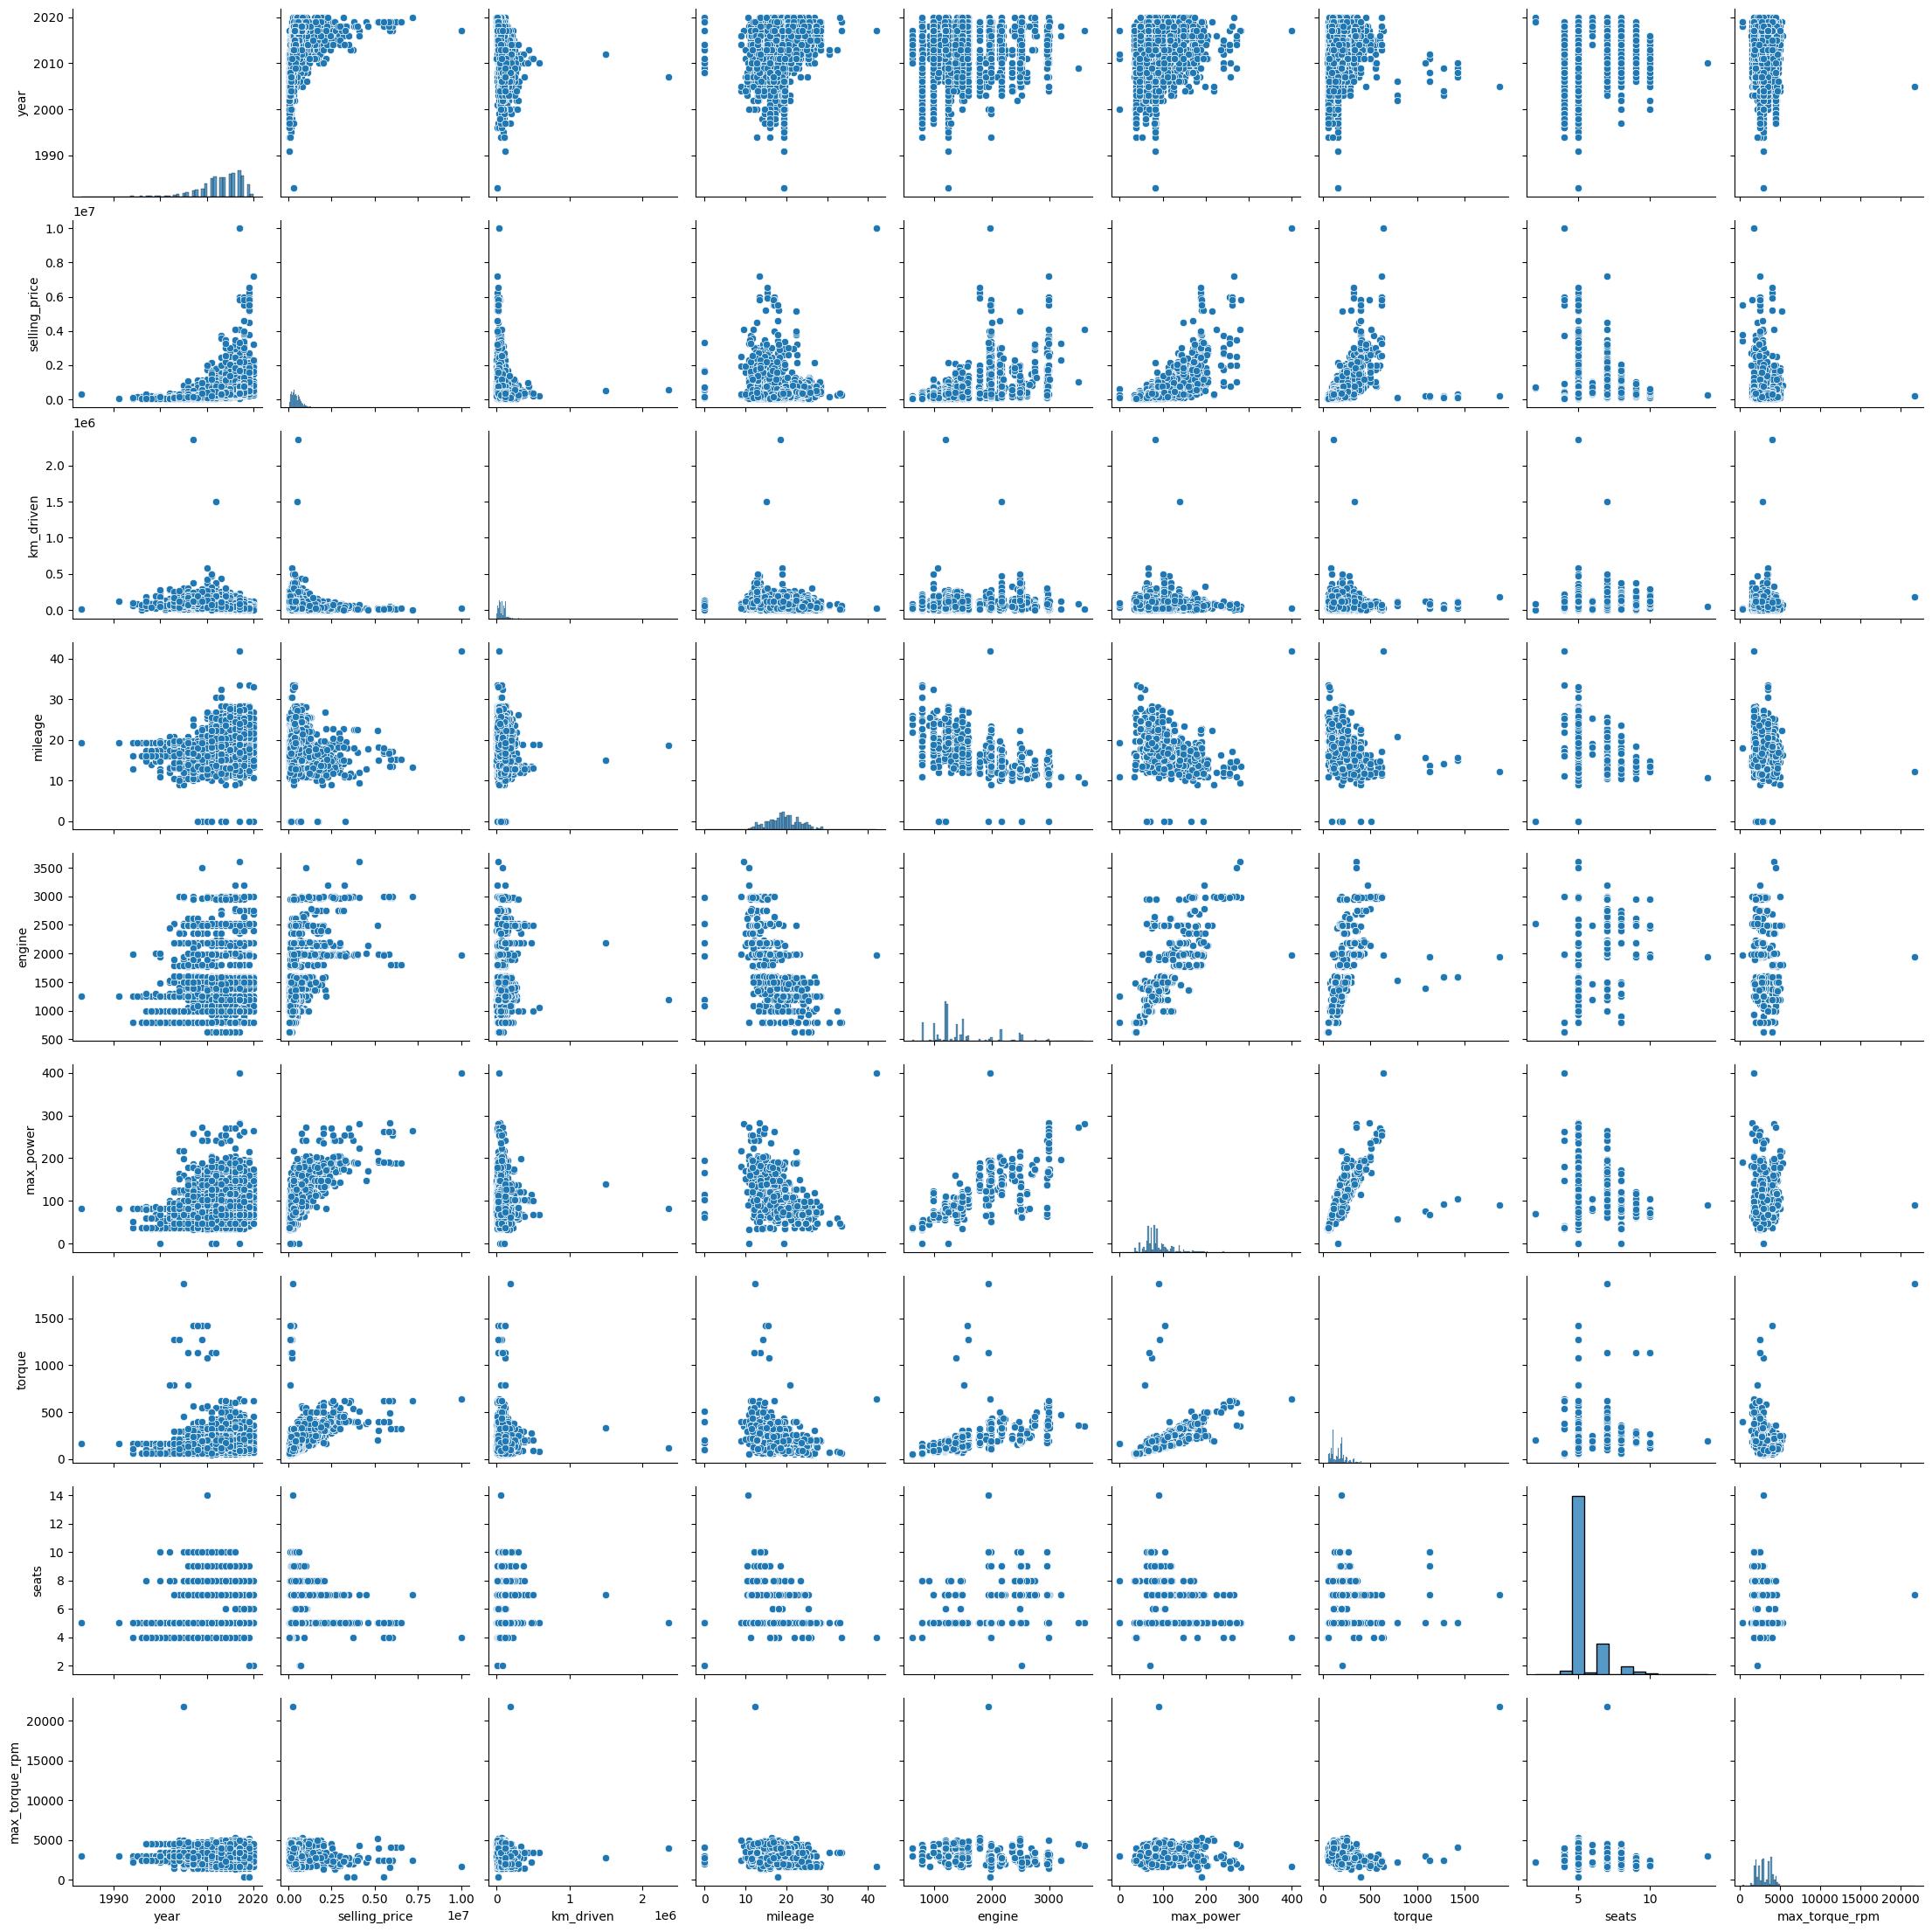

In [25]:
sns.pairplot(data=df_train)

Да, можно предположить на основе распределений связь признаков с целевой переменной. Так, например, чем больше крутящий момент и мощность двигателя, тем выше цена (за исключения нескольких нетипичный объектов). А например год выпуска влияет на цену совсем не так очевидно, некоторые старые машины продают по высокой цене. А количество мест почти не влияет на цену.

Да. можно на основе распределений выдвинуть гипотезу о корреляциях признаков, так, например, высокая корреляция между engine и max_power, и engine и torque.

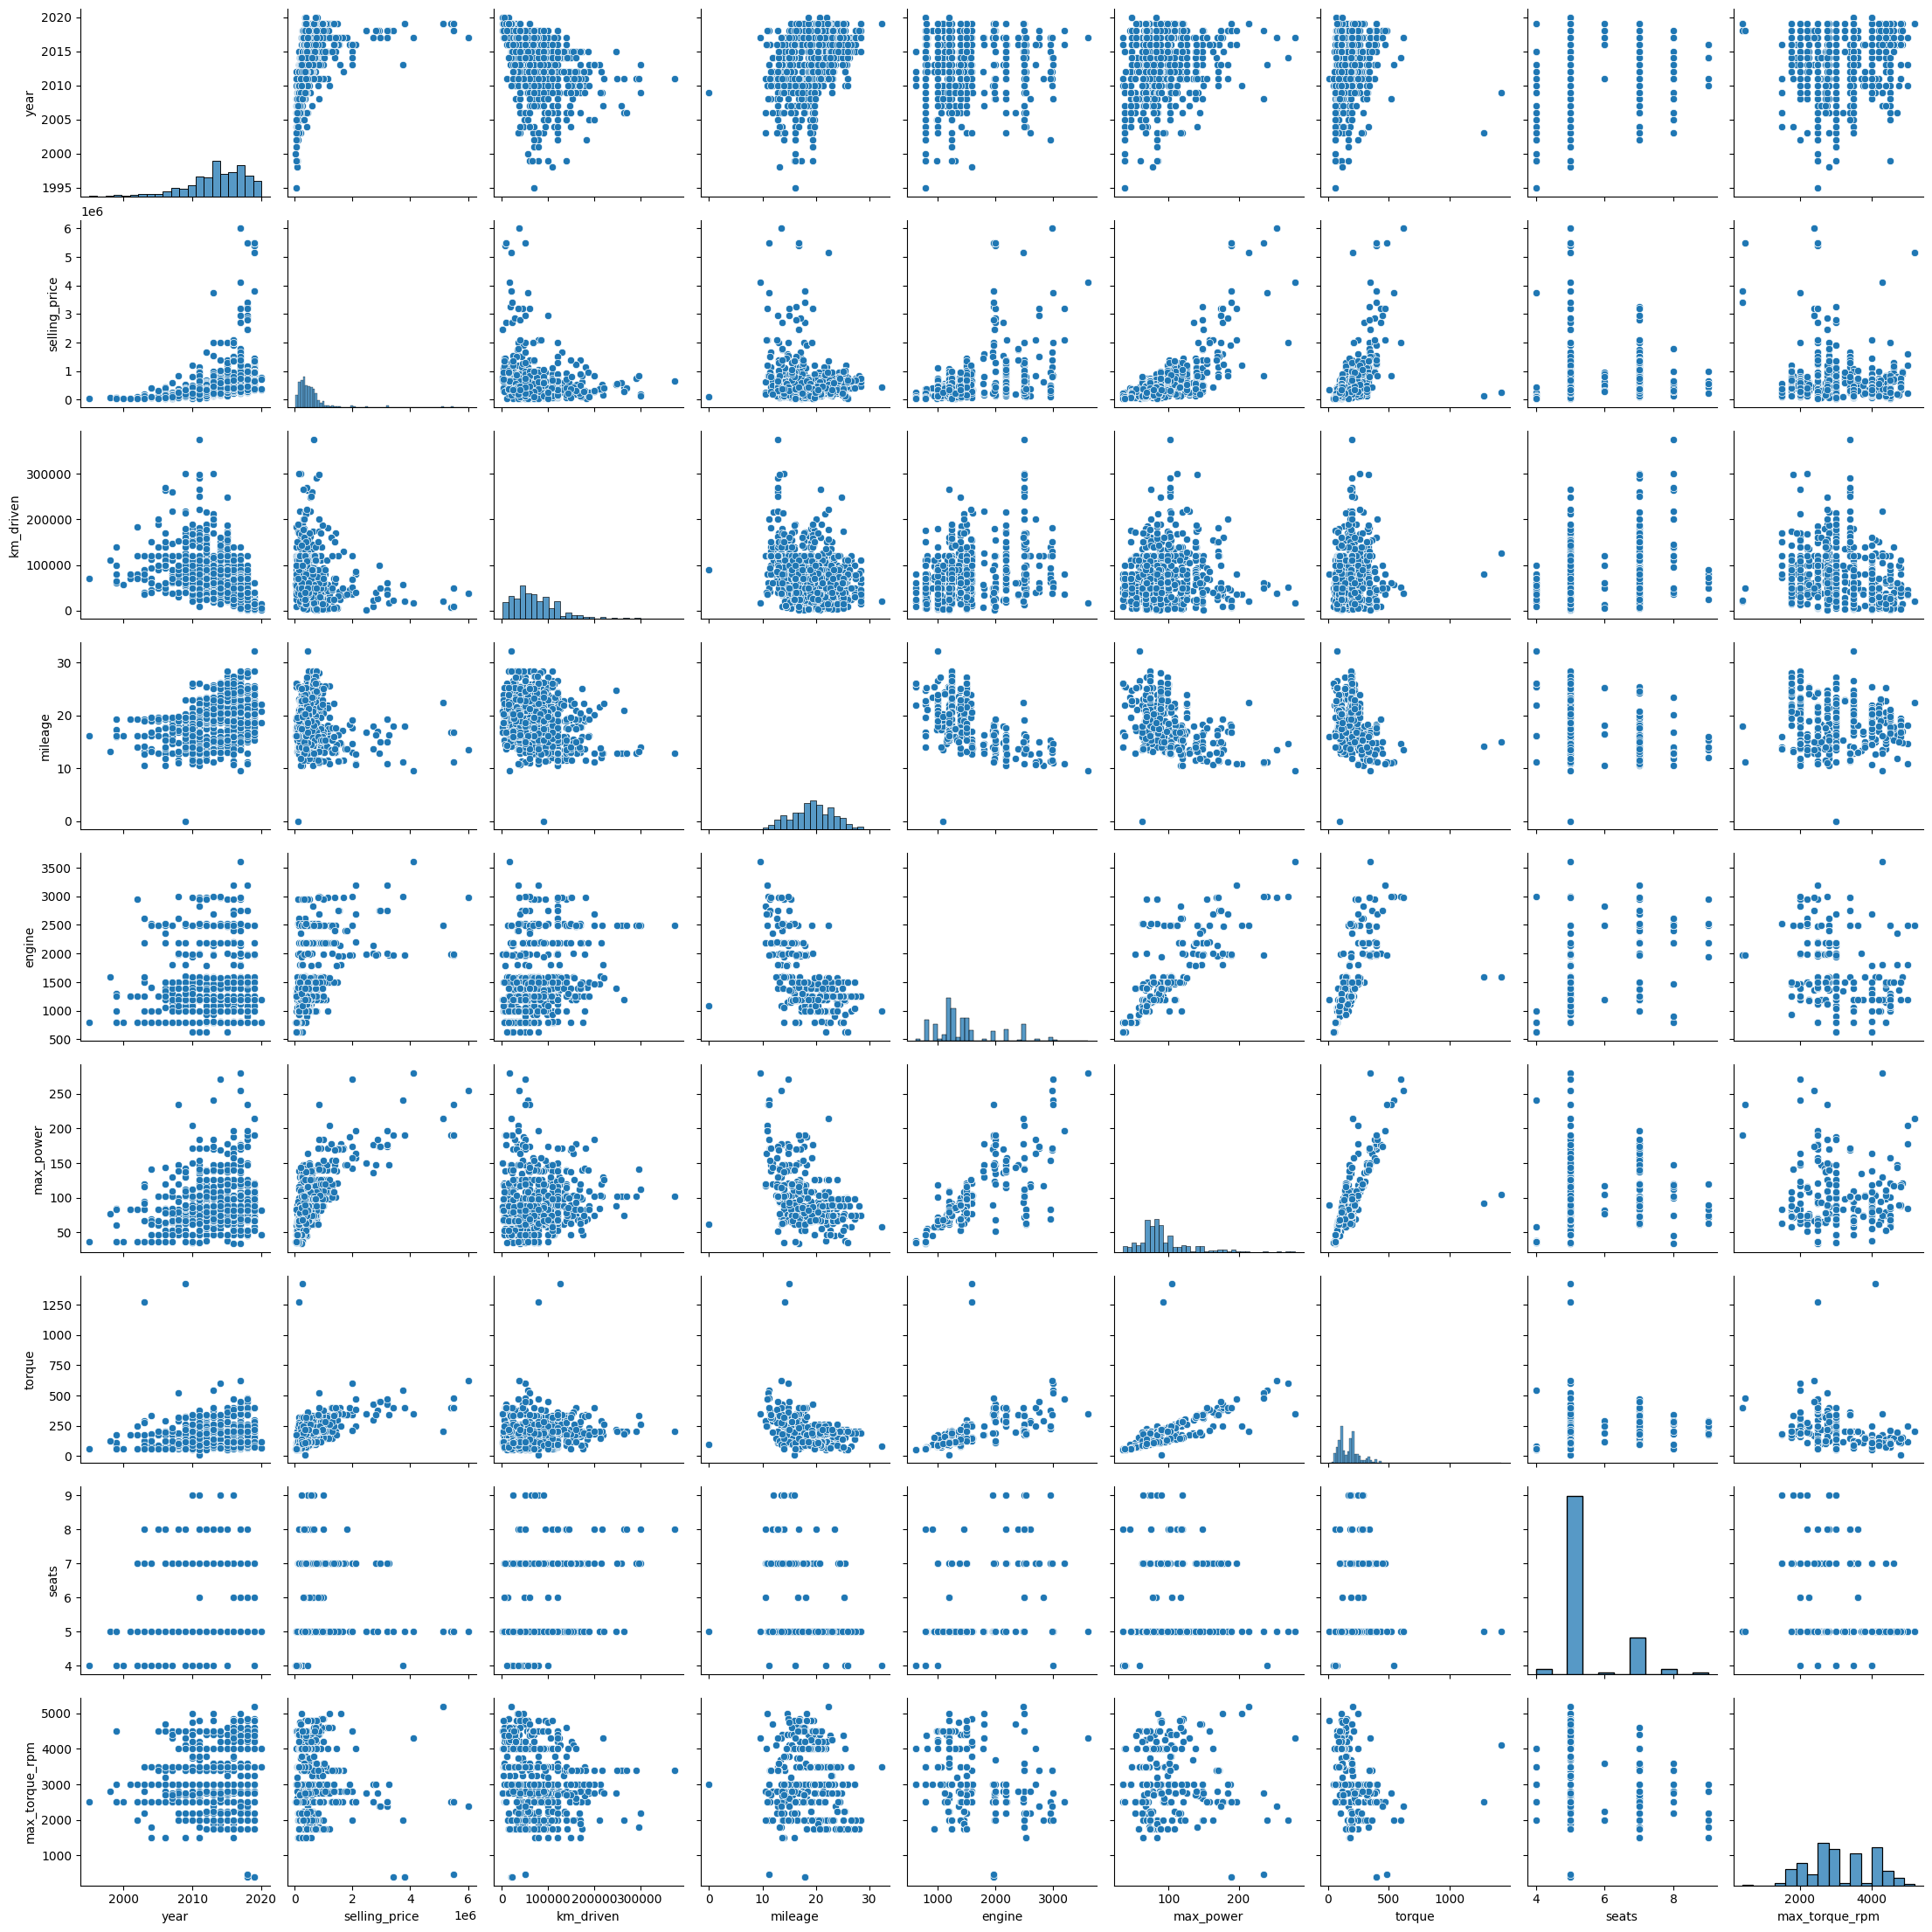

In [26]:
sns.pairplot(data=df_test)

Да, как распределение значений признаков, так и зависимость между данными в тесте и трейне, как мне кажется, похожи.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [27]:
df_train[list(col for col in df_train.columns if df_train[col].dtype in ["int64", "float64"])].corr()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.158207,0.053084,0.041178,0.046724
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692725,0.466374,0.149953,-0.097992
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024379,0.112968,0.192328,-0.202573
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.372197,-0.237626,-0.451059,-0.180155
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681247,0.600006,0.652172,-0.246025
max_power,0.158207,0.692725,0.024379,-0.372197,0.681247,1.000000,0.659505,0.242791,-0.024635
torque,0.053084,0.466374,0.112968,-0.237626,0.600006,0.659505,1.000000,0.316245,-0.270509
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.242791,0.316245,1.000000,-0.205181
max_torque_rpm,0.046724,-0.097992,-0.202573,-0.180155,-0.246025,-0.024635,-0.270509,-0.205181,1.000000


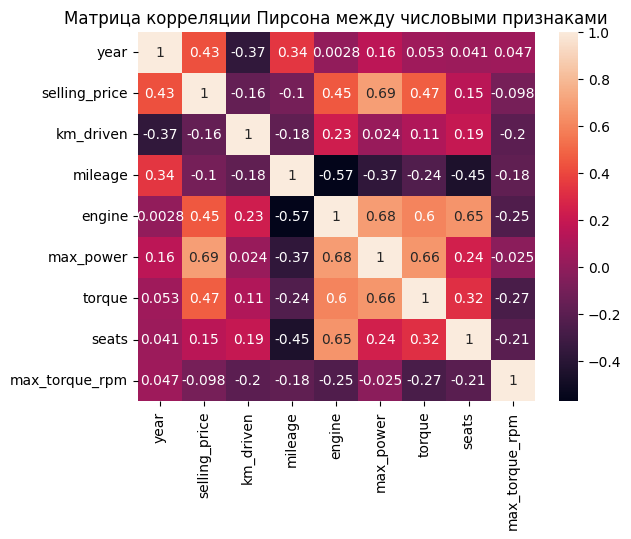

In [28]:
plt.title("Матрица корреляции Пирсона между числовыми признаками")
sns.heatmap(data=df_train[list(col for col in df_train.columns if df_train[col].dtype in ["int64", "float64"])].corr(), annot=True);

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

1. Наименее скоррелированы по модулю признаки: engine-year, max-torque_rpm-year, seats-year
2. Сильная положительная линейная зависимость: selling_price-max_power, engine-max_power, seats-engine
3. Нет, судя по данным, полчилось наоборот, чем больше год, тем больше ее пробег (0.34 положительная корреляция)
4. По умолчанию использовалась корреляция Пирсона, но можно поменять на Kendall или Pearson. Так, например, корреляция Спирмена использует связь между рангами и устойчива к выбросам.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [29]:
def rank(data):
    sorted_data = sorted((val, idx) for idx, val in enumerate(data))
    n = len(data)
    ranks = [0] * n
    i = 0
    while i < n:
        val, idx = sorted_data[i]
        # Обработка одинаковых значений
        j = i
        while j < n and sorted_data[j][0] == val:
            j += 1
        avg_rank = (i + 1 + j) / 2
        for k in range(i, j):
            ranks[sorted_data[k][1]] = avg_rank
        i = j
    return ranks

def spearman_correlation(x, y):
  if len(x) != len(y):
      raise ValueError("Списки должны быть одинаковой длины")

  n = len(x)

  rank_x = rank(x)
  rank_y = rank(y)

  d_squared_sum = sum((rx - ry) ** 2 for rx, ry in zip(rank_x, rank_y))

  # Вычисляем коэффициент Спирмена
  rho = 1 - (6 * d_squared_sum) / (n * (n**2 - 1))
  return rho


In [30]:
columns = list(col for col in df_train.columns if df_train[col].dtype in ["int64", "float64"])
n_cols = len(columns)
corr_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

for i in range(n_cols):
    for j in range(n_cols):
        corr_matrix.iloc[i, j] = spearman_correlation(df_train[columns[i]].tolist(),
                                                     df_train[columns[j]].tolist())

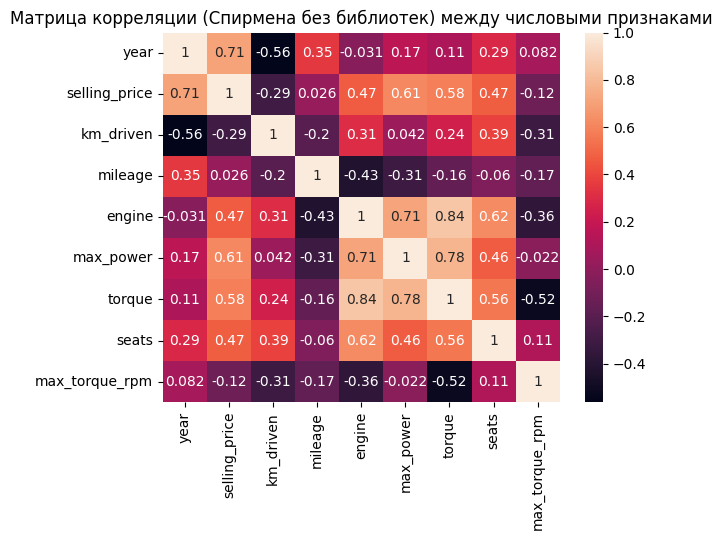

In [31]:
plt.title("Матрица корреляции (Спирмена без библиотек) между числовыми признаками")
sns.heatmap(data=corr_matrix, annot=True);

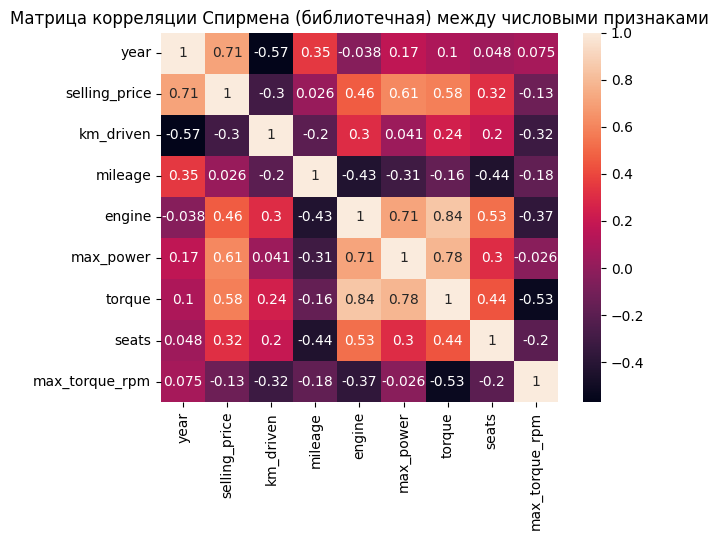

In [32]:
plt.title("Матрица корреляции Спирмена (библиотечная) между числовыми признаками")
sns.heatmap(data=df_train[list(col for col in df_train.columns if df_train[col].dtype in ["int64", "float64"])].corr(method="spearman"), annot=True);

Корреляция Спирмена реализована без библиотек успешно, результат почти соответсвует реализации через pandas. Различия возможно присутствуют из-за разного округления в ходе вычислений.

In [33]:
!pip install phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/usr/local/lib/python3.12/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


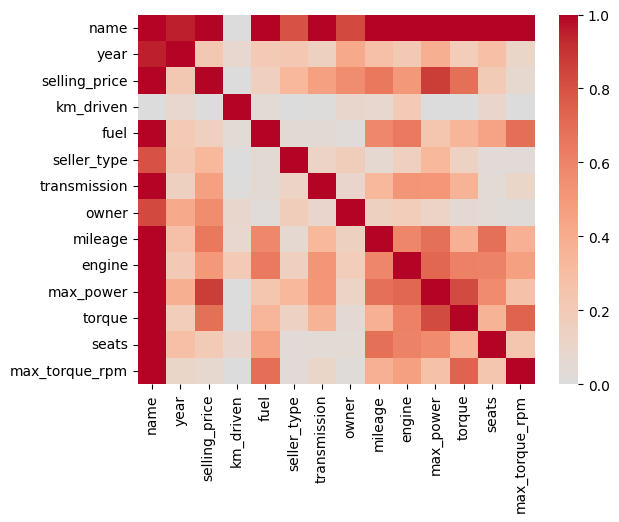

In [34]:
import phik

df_phik = df_train.phik_matrix()

sns.heatmap(df_phik, cmap="coolwarm", center=0)
plt.show()

Phik - корреляция между признаками, которая работает на любых типах данных, это возможно благодаря использованию Х2 критерия. Как мы видим, она корректно обработала все признаки. Так мы видим что почти со всеми признаками, кроме km_driven, коррелярует название, то есть модель автомобиля определяет его все характеристики, но не пробег, и владельца, что очень логично.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

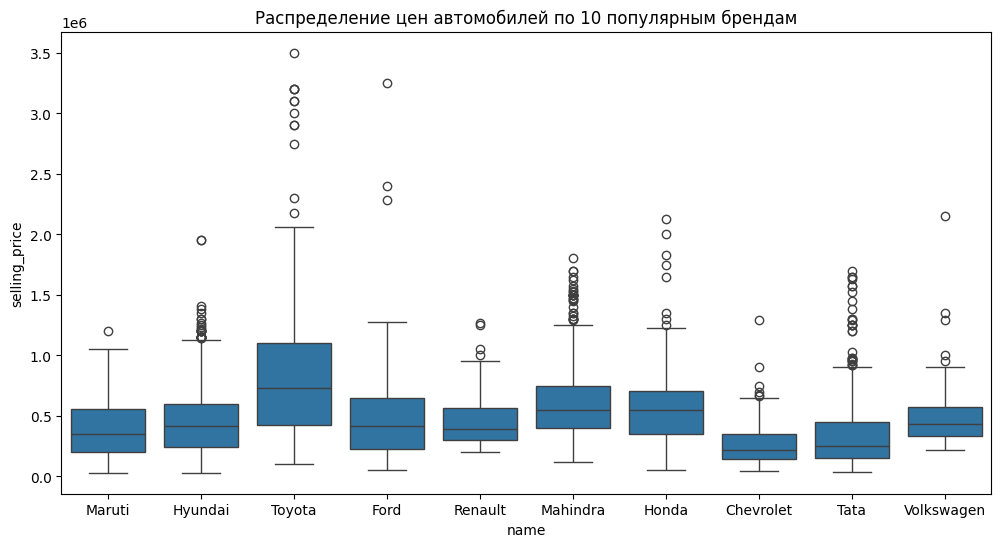

In [35]:
df_train_brand = df_train.copy()
df_train_brand["name"] = df_train_brand["name"].apply(lambda x: x.split()[0])

top10 = df_train_brand["name"].value_counts().head(10).index

df_top = df_train_brand[df_train_brand["name"].isin(top10)]

plt.figure(figsize=(12,6))
plt.title("Распределение цен автомобилей по 10 популярным брендам")
sns.boxplot(data=df_top, x="name", y="selling_price");

На этом графике отражено как бренд влияет на цену автомобиля, здесь явно видно, что, например, шевроле - бюджетный бренд, автомобили которого в среднем ниже чем у других, а например, тайота обычно дороже своих конкурентов, а так же самые дорогие проданные автомобили были от тайота

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


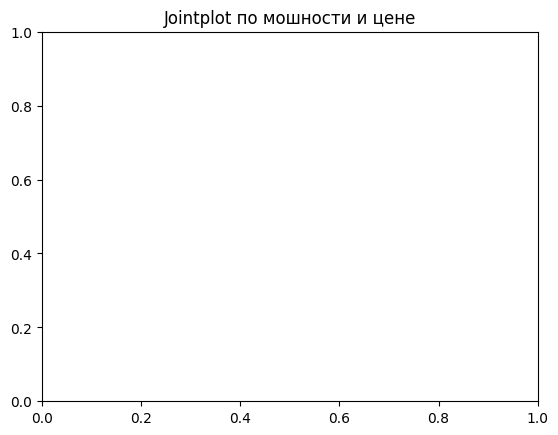

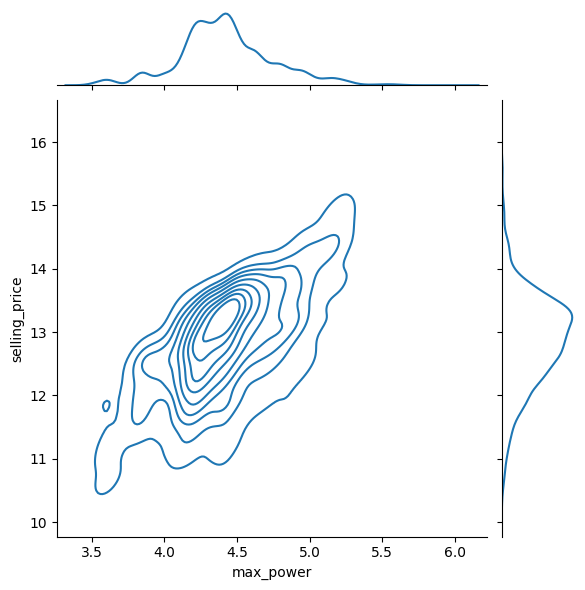

In [36]:
df_train_brand["max_power"] = np.log(df_train_brand["max_power"])
df_train_brand["selling_price"] = np.log(df_train_brand["selling_price"])

plt.title("Jointplot по мошности и цене")
sns.jointplot(data=df_train_brand, x="max_power", y="selling_price", kind="kde");

Исходя из этого Jointplot видно, что есть корреляция, и хорошо объяснимая линейно, между max_power и selling_price. А также даже выделился кластер маломощных и дешевых автомобилей в левом нижнем углу. Все хорошо видно именно на логарифмированной шкале




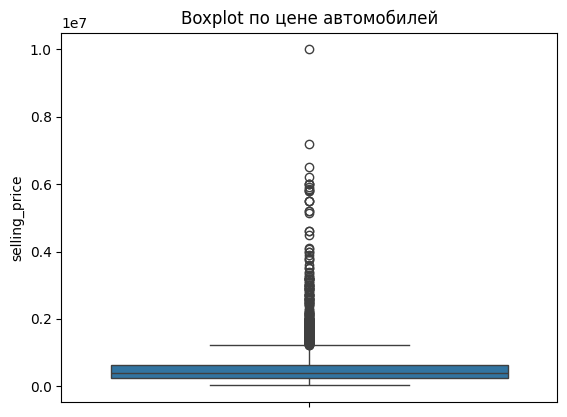

In [37]:
plt.title("Boxplot по цене автомобилей")
sns.boxplot(df_train.selling_price);

На первый взгляд кажется, вот у нас явные выбросы в ценах, и много. Но на самом деле, это не выбросы, а скорее просто отклонение от типичного поведения. Ну например, у нас что не могли продать однажды какую-нибудь раритетную машину в отличном качестве за очень много денег? Конечно могли, так что ничего уверенно удалять мы не можем.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [38]:
df_tr = df_train[list(col for col in df_train.columns if df_train[col].dtype in ["int64", "float64"])].copy()
df_te = df_test[list(col for col in df_test.columns if df_test[col].dtype in ["int64", "float64"])].copy()

In [39]:
# y_train = df_tr.selling_price
# X_train = df_tr.drop(columns=["selling_price"])

y_train = df_tr.selling_price
X_train = df_tr.drop(columns=["selling_price", "year"])

In [40]:
# Посчитал только year категориальной, поэтому адлил лишь ее
assert X_train.shape == (5840, 7)

In [41]:
# y_test = df_te.selling_price
# X_test = df_te.drop(columns=["selling_price"])

y_test = df_te.selling_price
X_test = df_te.drop(columns=["selling_price", "year"])

In [42]:
assert X_test.shape == (1000, 7)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(f"R2 = {r2_score(y_test, pred)}")
print(f"MSE = {MSE(y_test, pred)}")

R2 = 0.5724463348859337
MSE = 245770055775.44193


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [44]:
def my_r2_score(true, pred):
  y_mean = true.mean()
  S1 = np.sum((true - pred) ** 2)
  S2 = np.sum((true - y_mean) ** 2)
  return 1 - S1 / S2

In [45]:
my_r2_score(y_test, pred)

np.float64(0.5724463348859337)

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

**Где:**

- $n$ — количество наблюдений  
- $y_i$ — фактическое значение целевой переменной в i-ом наблюдении  
- $\hat{y}_i$ — предсказанное моделью значение в i-ом наблюдении  
- $\bar{y}$ — среднее значение фактических $y$:  
  $$\bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i$$
- $\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$ — сумма квадратов ошибок модели (**SSE**, Sum of Squared Errors)  
- $\sum_{i=1}^{n}(y_i - \bar{y})^2$ — полная сумма квадратов отклонений (**SST**, Total Sum of Squares)



R2 показывает, какую часть изменчивости наблюдаемой переменной можно объяснить с помощью построенной модели.



### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

$$
\bar{R}^2 = 1 - \left(1 - R^2\right)\frac{n - 1}{n - p - 1}
$$

**Где:**

- $\bar{R}^2$ — скорректированный коэффициент детерминации (Adjusted $R^2$)  
- $R^2$ — обычный коэффициент детерминации  
- $n$ — количество наблюдений  
- $p$ — число признаков (предикторов) в модели

**Когда применяется:**
- Так как учитывает количество признаков в модели, "штрафует" за добавление бесполезных признаков, которые значительно не улучшают модель. Может использоваться для упрощения сложных моделей

In [46]:
def my_adjusted_r2_score(true, pred, data):
  n = len(true)
  p = data.shape[1]
  r2 = my_r2_score(true, pred)
  return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [47]:
my_adjusted_r2_score(y_test, pred, X_train)

np.float64(0.5694293231361368)

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_transformed =  pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

model.fit(X_train_transformed, y_train)

pred = model.predict(X_test_transformed)

print(f"R2 = {r2_score(y_test, pred)}")
print(f"MSE = {MSE(y_test, pred)}")

R2 = 0.5724463348859337
MSE = 245770055775.44193


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [49]:
print("intercept:", model.intercept_)

pd.DataFrame({
    'Признак': X_train.columns.tolist(),
    'Вес (по модулю)': np.abs(model.coef_)
}).sort_values(["Вес (по модулю)"], ascending=False)


intercept: 522960.0910958905


,Признак,Вес (по модулю)
3,max_power,378305.992488
0,km_driven,100220.408282
1,mileage,88886.495765
2,engine,40425.409684
6,max_torque_rpm,35921.572851
5,seats,16098.868898
4,torque,6424.834924


Самыми информативными для предсказания цены оказались пробег и мощность автомобиля

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [50]:
from sklearn.linear_model import Lasso

model = Lasso()

model.fit(X_train_transformed, y_train)

pred = model.predict(X_test_transformed)

print(f"R2 = {r2_score(y_test, pred)}")

R2 = 0.572445362303724


In [51]:
print("intercept:", model.intercept_)

pd.DataFrame({
    'Признак': X_train.columns.tolist(),
    'Вес (по модулю)': np.abs(model.coef_)
}).sort_values(["Вес (по модулю)"], ascending=False)


intercept: 522960.0910958905


,Признак,Вес (по модулю)
3,max_power,378302.855037
0,km_driven,100219.338573
1,mileage,88884.137694
2,engine,40423.776367
6,max_torque_rpm,35920.443994
5,seats,16097.345027
4,torque,6420.662132


Нет, L1 регуляризация в данном случае не занулила никакие признаки. Это может быть связано с тем, что при исходном обучении не было признаков с очень низким весом.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [52]:
from sklearn.model_selection import GridSearchCV

model_cv = Lasso()

grid_search = GridSearchCV(model_cv, param_grid={
    "alpha": np.linspace(0.01, 1, 20),
    "fit_intercept": [True, False]}, cv=10)
grid_search.fit(X_train_transformed, y_train)

print('Лучшиая R2 в CV:', grid_search.best_score_)
print('Лучшие параметры:', grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(X_test_transformed)
test_score = best_model.score(X_test_transformed, y_test)
print('R2 на тесте для лучшей модели CV:', test_score)

Лучшиая R2 в CV: 0.4762615633808073
Лучшие параметры: {'alpha': np.float64(1.0), 'fit_intercept': True}
R2 на тесте для лучшей модели CV: 0.572445362303724


In [53]:
pd.DataFrame({
    'Признак': X_train.columns.tolist(),
    'Вес (по модулю)': np.abs(best_model.coef_)
}).sort_values(["Вес (по модулю)"], ascending=False)

,Признак,Вес (по модулю)
3,max_power,378302.855037
0,km_driven,100219.338573
1,mileage,88884.137694
2,engine,40423.776367
6,max_torque_rpm,35920.443994
5,seats,16097.345027
4,torque,6420.662132


Здесь было обучени 200 моделей (20 комбинаций параметров на 10 фолдов)
Alpha - множитель перед слагаемым L1 - регулирует силу регуляризации, fit_intercept - отвечает за использование свободного члена в регрессии

Лучший alpha = 1.0, никакие слагаемые не занулились. Полагаю по тем же причинам.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [54]:
from sklearn.linear_model import ElasticNet

model_cv_el = ElasticNet()

grid_search_el = GridSearchCV(model_cv_el, param_grid={
    "alpha": np.linspace(0.01, 1, 20),
    "l1_ratio": np.linspace(0.1, 1, 10),
    "fit_intercept": [True, False]}, cv=10)

grid_search_el.fit(X_train_transformed, y_train)

print('Лучшиая R2 в CV:', grid_search_el.best_score_)
print('Лучшие параметры:', grid_search_el.best_params_)

best_model = grid_search_el.best_estimator_
y_pred2 = best_model.predict(X_test_transformed)
test_score = best_model.score(X_test_transformed, y_test)
print('R2 на тесте для лучшей модели CV:', test_score)

Лучшиая R2 в CV: 0.4874498124740267
Лучшие параметры: {'alpha': np.float64(0.4789473684210527), 'fit_intercept': True, 'l1_ratio': np.float64(0.7000000000000001)}
R2 на тесте для лучшей модели CV: 0.5326904842473188


Результат ухудшился. Здесь обучалось 4000 моделей (400 комбинаций на 10 фолдов).

Коэффициенты так же не занулились, но изменились.

In [55]:
pd.DataFrame({
    'Признак': X_train.columns.tolist(),
    'Вес (по модулю)': np.abs(best_model.coef_)
}).sort_values(["Вес (по модулю)"], ascending=False)

,Признак,Вес (по модулю)
3,max_power,286783.180037
0,km_driven,93695.747146
2,engine,68479.564320
1,mileage,66756.278857
4,torque,35115.830024
6,max_torque_rpm,23004.576294
5,seats,1486.064474


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [56]:
# За основу взят код с пары 28.11.25, я только его доработал под эту задачу

from itertools import combinations
from sklearn.metrics import mean_squared_error, r2_score

# 1. Функция для расчёта AIC и BIC
def calculate_aic_bic_multi(model, X, Y):
    n, k = X.shape[0], X.shape[1]
    n_targets = 1

    y_pred = model.predict(X)

    mse = mean_squared_error(Y, y_pred)
    log_likelihood = -n * n_targets / 2 * (np.log(2 * np.pi * mse) + 1)

    total_params = n_targets * (k + 1)

    aic = 2 * total_params - 2 * log_likelihood
    bic = total_params * np.log(n) - 2 * log_likelihood

    return aic, bic


# 2. Перебор комбинаций признаков
n_features = X_train_transformed.shape[1]
min_aic, min_bic = float('inf'), float('inf')
best_aic_model, best_bic_model = None, None

for num_features in range(1, n_features + 1):
    for feature_subset in combinations(X_train_transformed.columns[:n_features], num_features):

        X_subset = X_train_transformed[list(feature_subset)]  # <-- DataFrame, не NumPy

        model = LinearRegression()
        model.fit(X_subset, y_train)  # <-- обучаем с именами признаков

        aic, bic = calculate_aic_bic_multi(model, X_subset, y_train)

        if aic < min_aic:
            min_aic = aic
            best_aic_model = (model, feature_subset)

        if bic < min_bic:
            min_bic = bic
            best_bic_model = (model, feature_subset)


# 3. Вывод найденных моделей
print(f"Best AIC: {min_aic:.2f} using features {best_aic_model[1]}")
print(f"Best BIC: {min_bic:.2f} using features {best_bic_model[1]}")


# 4. Оценка на тесте
X_test_aic = X_test_transformed[list(best_aic_model[1])]
X_test_bic = X_test_transformed[list(best_bic_model[1])]

model_aic = best_aic_model[0]
model_bic = best_bic_model[0]

# MSE
aic_test_mse = mean_squared_error(y_test, model_aic.predict(X_test_aic))
bic_test_mse = mean_squared_error(y_test, model_bic.predict(X_test_bic))

# R2
aic_train_r2 = r2_score(y_train, model_aic.predict(X_train_transformed[list(best_aic_model[1])]))
aic_test_r2  = r2_score(y_test,  model_aic.predict(X_test_aic))

bic_train_r2 = r2_score(y_train, model_bic.predict(X_train_transformed[list(best_bic_model[1])]))
bic_test_r2  = r2_score(y_test,  model_bic.predict(X_test_bic))


print("\nAIC model:")
print(f"Test R2:  {aic_test_r2:.4f}")
print(f"Test MSE: {aic_test_mse:.4f}")

print("\nBIC model:")
print(f"Test R2:  {bic_test_r2:.4f}")
print(f"Test MSE: {bic_test_mse:.4f}")

Best AIC: 166092.63 using features ('km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm')
Best BIC: 166136.09 using features ('km_driven', 'mileage', 'engine', 'max_power', 'max_torque_rpm')

AIC model:
Test R2:  0.5722
Test MSE: 245901448727.1299

BIC model:
Test R2:  0.5738
Test MSE: 245011661514.8741


Таким образом, в ходе перебора с помощью itertools необходимых признаков для обучения модели и оптимизации Байесовского и Акаике информационных критериев модель получила метрики лучше, чем в предыдущих управжнениях. А также за счет удаления критериев он стала проще

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Столбец name содержит полное название автомобиля, следует извлечь из него марку.

In [57]:
df_tr_cat = df_train.copy()
df_te_cat = df_test.copy()

df_tr_cat["name"] = df_tr_cat.name.apply(lambda x: x.split()[0])
df_te_cat["name"] = df_te_cat.name.apply(lambda x: x.split()[0])

X_train_cat = df_tr_cat.drop(columns=["selling_price"])
X_test_cat = df_te_cat.drop(columns=["selling_price"])

Немного не понял, как должно получиться 11 признаков, у меня их 14 - и числовых и категориальных

In [58]:
# assert X_train_cat.shape == (5840, 11)
assert X_train_cat.shape == (5840, 13)

In [59]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [60]:
X_train_cat["seats"] = X_train_cat["seats"].astype(str)
X_test_cat["seats"] = X_test_cat["seats"].astype(str)

cat_cols = [col for col in X_train_cat.columns if X_train_cat[col].dtype == "object"]

combined = pd.concat([X_train_cat, X_test_cat], axis=0)

encoded_combined = pd.get_dummies(combined[cat_cols], drop_first=True)

encoded_X_train_cat = encoded_combined.iloc[:len(X_train_cat), :]
encoded_X_test_cat = encoded_combined.iloc[len(X_train_cat):, :]

In [61]:
final_X_train = pd.concat([X_train_cat[list(col for col in X_train_cat.columns if X_train_cat[col].dtype in ["int64", "float64"])], encoded_X_train_cat], axis=1)
final_X_test = pd.concat([X_test_cat[list(col for col in X_test_cat.columns if X_test_cat[col].dtype in ["int64", "float64"])], encoded_X_test_cat], axis=1)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. Нужно "обучать" алгоритм на трейне и использовть и на трейне, и на тесте. Потому что количество уникальных значений категориальной переменной может быть различно в тесте и трейне. (Здесь я использовал pd getdumies сразу на трейне и на тесте, это может вызывать небольшой data leak, дальше будет использован так же и sklearn OHE с обучением только на трейне)

2. Мы удаляем один столбец, чтобы не получить мульколлениарность. Если этого не сделать, столбцы будут составлять в сумме единичный столбец и тогда столбцы можно будет выражать через друг друга.

3. Нет, удалять нельзя. Потому что если все столбцы категории равны 0, то этот объект относится к базовой категории (которую занулили), а если мы удалим дополнительные столбцы, возникнет ситуация, когда все 0 будут у объектов не только базовой категории.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_final = Ridge()

grid_search_final = GridSearchCV(model_final, param_grid={
    "alpha": np.linspace(0.01, 1, 20)}, cv=10)

grid_search_final.fit(final_X_train, y_train)

print('Лучшиая R2 в CV:', grid_search_final.best_score_)
print('Лучшие параметры:', grid_search_final.best_params_)

best_model = grid_search_final.best_estimator_
y_pred3 = best_model.predict(final_X_test)
test_score = best_model.score(final_X_test, y_test)
print('R2 на тесте для лучшей модели CV:', test_score)

Лучшиая R2 в CV: 0.7117819021821326
Лучшие параметры: {'alpha': np.float64(1.0)}
R2 на тесте для лучшей модели CV: 0.7840993035412006


Результат очень значительно улучшился

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Извлечем не только бренд автомобиля, но и его модель.

In [63]:
def proces_cat_features(df_train, df_test):
  X_train_cat = df_train.drop(columns=["selling_price"])
  X_test_cat = df_test.drop(columns=["selling_price"])

  X_train_cat["seats"] = X_train_cat["seats"].astype(str)
  X_test_cat["seats"] = X_test_cat["seats"].astype(str)

  cat_cols = [col for col in X_train_cat.columns if X_train_cat[col].dtype == "object"]

  combined = pd.concat([X_train_cat, X_test_cat], axis=0)

  encoded_combined = pd.get_dummies(combined[cat_cols], drop_first=True)

  encoded_X_train_cat = encoded_combined.iloc[:len(X_train_cat), :]
  encoded_X_test_cat = encoded_combined.iloc[len(X_train_cat):, :]

  final_X_train = pd.concat([X_train_cat[list(col for col in X_train_cat.columns if X_train_cat[col].dtype in ["int64", "float64"])], encoded_X_train_cat], axis=1)
  final_X_test = pd.concat([X_test_cat[list(col for col in X_test_cat.columns if X_test_cat[col].dtype in ["int64", "float64"])], encoded_X_test_cat], axis=1)

  return final_X_train, final_X_test

In [64]:
def process_name(value):
  data = value.split()
  return data[0], data[1]

df_tr_cat = df_train.copy()
df_te_cat = df_test.copy()

df_tr_cat[["brand", "model"]] = df_tr_cat.name.apply(lambda x: pd.Series(process_name(x)))
df_te_cat[["brand", "model"]] = df_te_cat.name.apply(lambda x: pd.Series(process_name(x)))

df_tr_cat = df_tr_cat.drop(columns=["name"])
df_te_cat = df_te_cat.drop(columns=["name"])

final_X_train, final_X_test = proces_cat_features(df_tr_cat, df_te_cat)

In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_final = Ridge()

grid_search_final = GridSearchCV(model_final, param_grid={
    "alpha": np.linspace(0.01, 1, 20)}, cv=10)

grid_search_final.fit(final_X_train, y_train)

print('Лучшиая R2 в CV:', grid_search_final.best_score_)
print('Лучшие параметры:', grid_search_final.best_params_)

best_model = grid_search_final.best_estimator_
y_pred4 = best_model.predict(final_X_test)
test_score = best_model.score(final_X_test, y_test)
print('R2 на тесте для лучшей модели CV:', test_score)

Лучшиая R2 в CV: 0.7845893199588585
Лучшие параметры: {'alpha': np.float64(0.37473684210526315)}
R2 на тесте для лучшей модели CV: 0.924723547297808


Очень хороший прирост. Поработаем с годом - лучше иметь не год выпуска автомобиля, а его возраст. Также построим все полиномы 2 степени числовых признаков. А после трансформируем численные признаки.

In [66]:
from sklearn.preprocessing import PolynomialFeatures

df_tr_cat["year"] = 2020 - df_tr_cat["year"]
df_te_cat["year"] = 2020 - df_te_cat["year"]

final_X_train, final_X_test = proces_cat_features(df_tr_cat, df_te_cat)

num_cols = final_X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = final_X_train.select_dtypes(include=[bool]).columns

poly = PolynomialFeatures(degree=2, include_bias=False)

final_X_train_poly = pd.DataFrame(poly.fit_transform(final_X_train[num_cols]), columns=poly.get_feature_names_out(num_cols))
final_X_test_poly = pd.DataFrame(poly.fit_transform(final_X_test[num_cols]), columns=poly.get_feature_names_out(num_cols))

scaler.fit(final_X_train_poly)

final_X_train_poly_transformed = pd.DataFrame(
    scaler.transform(final_X_train_poly),
    columns=final_X_train_poly.columns,
    index=final_X_train_poly.index
)

final_X_test_poly_transformed = pd.DataFrame(
    scaler.transform(final_X_test_poly),
    columns=final_X_test_poly.columns,
    index=final_X_test_poly.index
)

final_X_train = pd.concat([final_X_train[cat_cols], final_X_train_poly_transformed], axis=1)
final_X_test = pd.concat([final_X_test[cat_cols], final_X_test_poly_transformed], axis=1)

In [67]:
model_final = Ridge()

grid_search_final = GridSearchCV(model_final, param_grid={
    "alpha": np.linspace(0.01, 1, 20)}, cv=10)

# grid_search_final.fit(final_X_train, np.log(y_train))
grid_search_final.fit(final_X_train, y_train)

print('Лучшиая R2 в CV:', grid_search_final.best_score_)
print('Лучшие параметры:', grid_search_final.best_params_)

best_model = grid_search_final.best_estimator_
y_pred5 = best_model.predict(final_X_test)
test_score = best_model.score(final_X_test, y_test)
print('R2 на тесте для лучшей модели CV:', test_score)

Лучшиая R2 в CV: 0.7859172668198062
Лучшие параметры: {'alpha': np.float64(1.0)}
R2 на тесте для лучшей модели CV: 0.9462973939431103


Результат уже отличный, попробуем его улучшить

поработаем с распределением признаков и выбрасами:

In [68]:
data_train = df_train.copy()
data_test = df_test.copy()

Отлогарифмируем признаки, нераспределенные нормально

<Axes: xlabel='mileage', ylabel='Density'>

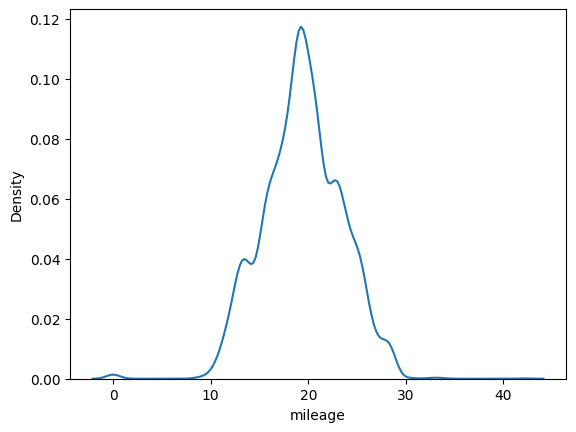

In [69]:
sns.kdeplot(data_train.mileage)

<Axes: xlabel='engine', ylabel='Density'>

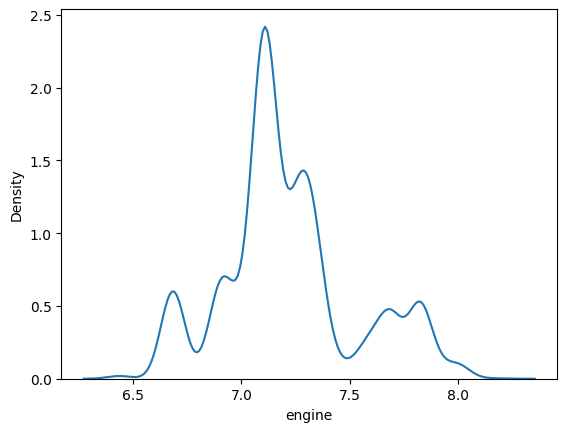

In [70]:
sns.kdeplot(np.log(data_train.engine))

<Axes: xlabel='max_power', ylabel='Density'>

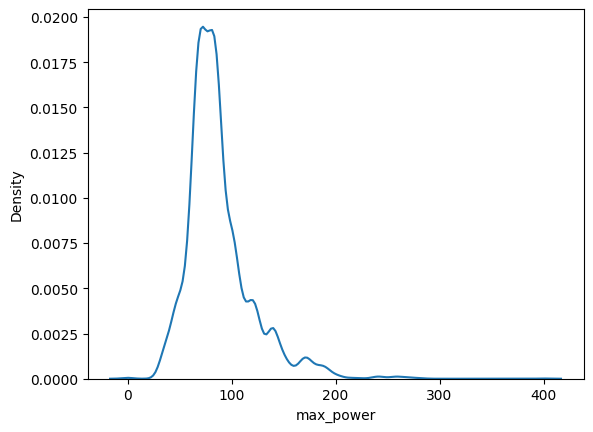

In [71]:
sns.kdeplot(data_train.max_power)

<Axes: xlabel='torque', ylabel='Density'>

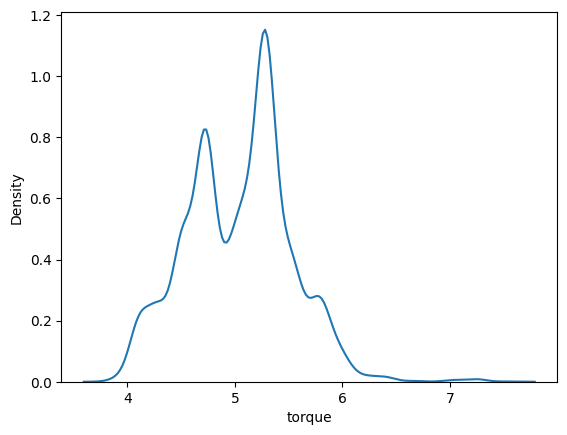

In [72]:
sns.kdeplot(np.log(data_train.torque))

<Axes: xlabel='km_driven', ylabel='Density'>

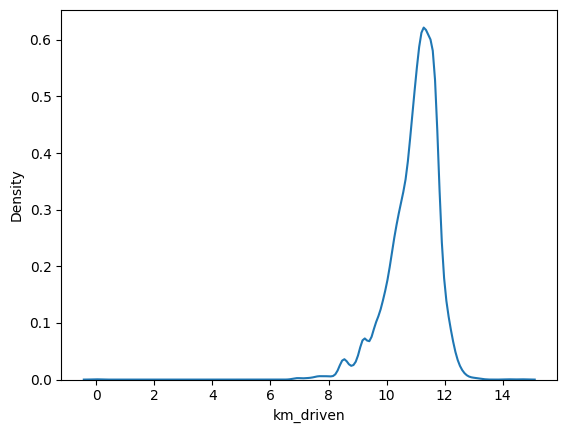

In [73]:
sns.kdeplot(np.log(data_train.km_driven))

In [74]:
from sklearn.preprocessing import OneHotEncoder

# Так же обработаем столбец имени
data_train[["brand", "model"]] = data_train.name.apply(lambda x: pd.Series(process_name(x)))
data_test[["brand", "model"]] = data_test.name.apply(lambda x: pd.Series(process_name(x)))

data_train = data_train.drop(columns=["name"])
data_test = data_test.drop(columns=["name"])

X_train_2 = data_train.drop(columns=["selling_price"])
X_test_2 = data_test.drop(columns=["selling_price"])

# Чтобы обработать seats как категориальную переменную, переведем ее к типу object
X_train_2["seats"] = X_train_2["seats"].astype(str)
X_test_2["seats"] = X_test_2["seats"].astype(str)

categorical = [col for col in X_train_2.columns if X_train_2[col].dtype == "object"]
numeric = X_train_2.drop(columns=categorical).columns.tolist()

# Конечно, корректно для OHE использовать не pd.get_dumies, а sklearn OHE. Только так можно корректно обработать train и test
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_2[categorical])

train_arr = encoder.transform(X_train_2[categorical])
test_arr = encoder.transform(X_test_2[categorical])

ohe_cols = encoder.get_feature_names_out(categorical)

X_train_2 = pd.concat([pd.DataFrame(train_arr, columns=ohe_cols, index=X_train_2.index), X_train_2[numeric]], axis=1)
X_test_2 = pd.concat([pd.DataFrame(test_arr, columns=ohe_cols, index=X_test_2.index), X_test_2[numeric]], axis=1)


In [75]:
X_train_2["year"] = 2020 - X_train_2["year"]
X_test_2["year"] = 2020 - X_test_2["year"]

# Добавим число "лошадей" на литр объема
X_train_2["pow/V"] = X_train_2["max_power"] / X_train_2["engine"]
X_test_2["pow/V"] = X_test_2["max_power"] / X_test_2["engine"]

for log_col in ["km_driven", "torque", "engine"]:
  X_train_2[log_col] = np.log(X_train_2[log_col])
  X_test_2[log_col] = np.log(X_test_2[log_col])

categorical = [col for col in X_train_2.columns if X_train_2[col].dtype == "object"]
numeric = X_train_2.drop(columns=categorical).columns.tolist()

poly = PolynomialFeatures(degree=2, include_bias=False)

categorical = [col for col in X_train_2.columns if X_train_2[col].dtype == "object"]

X_train_2_poly = pd.DataFrame(
    poly.fit_transform(X_train_2[numeric]),
    columns=poly.get_feature_names_out(numeric),
    index=X_train_2.index)

X_test_2_poly = pd.DataFrame(
    poly.transform(X_test_2[numeric]),
    columns=poly.get_feature_names_out(numeric),
    index=X_test_2.index)

scaler.fit(X_train_2_poly)

X_train_2_poly_transformed = pd.DataFrame(
    scaler.transform(X_train_2_poly),
    columns=X_train_2_poly.columns,
    index=X_train_2_poly.index)

X_test_2_poly_transformed = pd.DataFrame(
    scaler.transform(X_test_2_poly),
    columns=X_test_2_poly.columns,
    index=X_test_2_poly.index)

final_X_train_2 = pd.concat([X_train_2[categorical], X_train_2_poly_transformed], axis=1)
final_X_test_2 = pd.concat([X_test_2[categorical], X_test_2_poly_transformed], axis=1)

In [76]:
# В этот раз используем minmax scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit только на train
scaler.fit(X_train_2)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_2),
    columns=X_train_2.columns,
    index=X_train_2.index)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_2),
    columns=X_test_2.columns,
    index=X_test_2.index)

# minmax scaler не испортит OHE вида 1.0 и 0.0

In [77]:
model_best = Ridge()

grid_search_best = GridSearchCV(model_best, param_grid={
    "alpha": np.linspace(0.01, 1, 20)}, cv=10)

grid_search_best.fit(X_train_scaled, y_train)

print('Лучшие параметры:', grid_search_best.best_params_)

best_model2 = grid_search_best.best_estimator_
y_pred7 = best_model2.predict(X_test_scaled)
test_score = best_model2.score(X_test_scaled, y_test)
print('R2 на тесте для лучшей модели CV:', test_score)

Лучшие параметры: {'alpha': np.float64(0.21842105263157896)}
R2 на тесте для лучшей модели CV: 0.9176693490094714


Результат с minmax scaler и логарифмированием оказался хуже. Посмотрим на целевую переменную.

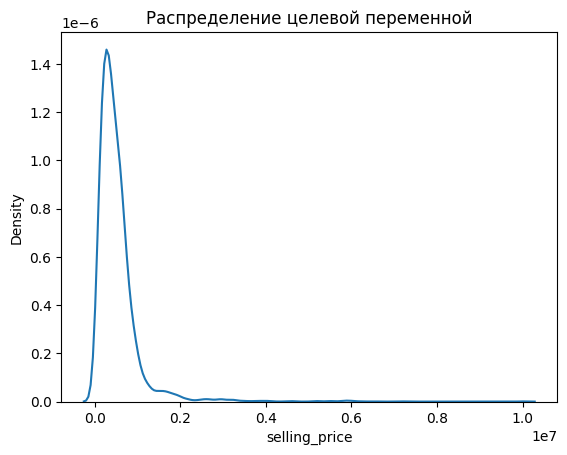

In [78]:
plt.title("Распределение целевой переменной")
sns.kdeplot(data_train.selling_price);

Она распределена совершенно не нормально, это может сильно мешать оптимизации MSE, отлогорифмируем ее

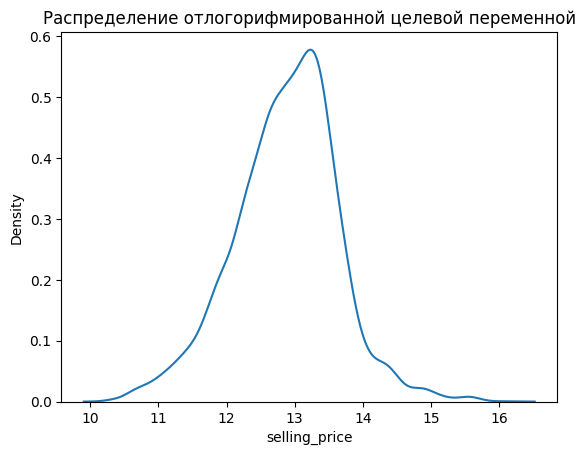

In [79]:
plt.title("Распределение отлогорифмированной целевой переменной")
sns.kdeplot(np.log(data_train.selling_price));

Вот так гораздо лучше. Обучим 2 лучшие модели на отлогорифмированном таргете.

In [80]:
grid_search_final.fit(final_X_train, np.log(y_train))

print('Лучшие параметры:', grid_search_final.best_params_)

best_model = grid_search_final.best_estimator_
y_pred5_log = np.exp(best_model.predict(final_X_test))

print('R2 на отлогорифмированном таргете 5 модели:', r2_score(y_test, y_pred5_log))

print(15 * "---")

grid_search_best.fit(X_train_scaled, np.log(y_train))

print('Лучшие параметры:', grid_search_best.best_params_)

best_model2 = grid_search_best.best_estimator_
y_pred7_log = np.exp(best_model2.predict(X_test_scaled))

print('R2 на отлогорифмированном таргете 7 модели:', r2_score(y_test, y_pred7_log))

Лучшие параметры: {'alpha': np.float64(0.21842105263157896)}
R2 на отлогорифмированном таргете 5 модели: 0.9634151872407335
---------------------------------------------
Лучшие параметры: {'alpha': np.float64(0.4268421052631579)}
R2 на отлогорифмированном таргете 7 модели: 0.945060842515517


Прирост оказался очень существенным 0.946 --> 0.963 для первой модели и 0.917 --> 0.945 для второй. Конечно, можно еще что-то поделать, пообрабатывать name, попридумывать новые признаки как граничные, переработать заполнение пропусков. Но на самом деле, по моему мнению, результат уже отличный, выше уже он не будет, так что здесь я остановлюсь.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [81]:
def business_metrics(y_true, y_pred):

   predictions = abs(y_pred - y_true) / y_true

   return sum(predictions <= 0.1) / len(predictions)


for i, pred in enumerate([y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred7, y_pred5_log, y_pred7_log]):
  print(f"Бизнес-метрика для модели {i} = {business_metrics(y_test, pred)}")

Бизнес-метрика для модели 0 = 0.189
Бизнес-метрика для модели 1 = 0.18
Бизнес-метрика для модели 2 = 0.307
Бизнес-метрика для модели 3 = 0.363
Бизнес-метрика для модели 4 = 0.386
Бизнес-метрика для модели 5 = 0.343
Бизнес-метрика для модели 6 = 0.47
Бизнес-метрика для модели 7 = 0.452


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Недопрогноз хуже, значит нужно дополнительно штрафовать для случаем y_pred < y_true.

In [82]:
def asymmetric_exp_error(y_true, y_pred, alpha=1.5):
    r = y_true - y_pred
    rel_error = np.abs(r) / y_true
    weights = np.where(r > 0, alpha, 1.0)
    return 1 - np.mean(weights * rel_error)

# Метрика не отнормирована, но позволяет сравнивать модели по критерию бизнеса.

for i, pred in enumerate([y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred7, y_pred5_log, y_pred7_log]):
  print(f"Бизнес-метрика для модели {i} = {asymmetric_exp_error(y_test, pred)}")

Бизнес-метрика для модели 0 = 0.2841741765389447
Бизнес-метрика для модели 1 = 0.34345893843193076
Бизнес-метрика для модели 2 = 0.4620112431713933
Бизнес-метрика для модели 3 = 0.5891814398128095
Бизнес-метрика для модели 4 = 0.7060750357974899
Бизнес-метрика для модели 5 = 0.5999313649111757
Бизнес-метрика для модели 6 = 0.8219881782871985
Бизнес-метрика для модели 7 = 0.8132620560595708


# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 25**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

Сохраним picke файл лучшей модели:

In [83]:
import pickle

with open('bestmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)

**Выводы:** В ходе проделанной работы была проведен полный пусть создания модели. Началась работа с предобработки - заполнения пропусков, удаления дубликатов. Обработаны признаки, также написана функция для обработки признака torque, позволяюща извлечь из строки крутящий момент и количество оборотов с учетом единиц измерений. Далее построены sns.pairplot, отражающий взаимодействие признаков между собой, это позволяет задать эту зависимость в будущем Feature Engineering. Также были построены матрицы корреляции числовых признаков.

Далее были обучени модели линейной регрессии, модель только на числовых данных показывала результат всего R2 0.55, при добавлении категориальных признаков и OHE он вырос уже до более чем 0.7. Так же были использованы различные методы регуляризации L1, L2 и L0. Правильная обработка признака name - извлечение из него и бренда и марки автомобиля, а также использование standard scaler и построения всех полиномов численных признаков 2 степени позволило добиться результата R2 0.946 на тестовых данных (изменение алгоритма регуляризации здесь не сильно влияло на результат).

После были попытки улучшить результат, путем генерации новых признаков, логарифмирования и использования minmax scaler, но это только немного ухудшило результат.

Наибольший прирост в качестве дало извлечение из name бренда (~ +0.1 R2) и марки автомобила (~+0.2 R2). Также очень большой прирост как в R2, так и в бизнес метриках дало логарифмирование таргета, это позволило привести распределение цен к нормальному виду, что очень ценно для линейных моделей.

В конце работы были написаны бизнес-метрики и по ним отобрана лучшая модель.

В конечном итоге была получена модель с R2 = 0.963, 0.47 и 0.82 по бизнес метрикам. Я считаю результат отличным.